In [1]:
from pytrends.request import TrendReq
from pandas.io.json import json_normalize
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from datetime import date
import matplotlib.dates as mdates
import numpy as np
import matplotlib.pyplot as plotter
import os
from more_itertools import chunked
import seaborn as sns

In [4]:
#Keyword search
keyword_1 = input()

aws


In [5]:
keyword_2 = input()

gcp


In [6]:
keyword_3 = input()

azure


In [7]:
user_kw_list = [keyword_1]
if keyword_2:
    user_kw_list.append(keyword_2)
if keyword_3:
    user_kw_list.append(keyword_3)

In [8]:
user_cat = 0 
user_timeframe = 'today 1-y' 
user_geo = ''

In [9]:
#Timeframe
timeframe_list = ('Here is the list of the timeframes available: \n all: all \n last 5 years: 5 years \n last 4 years: 4 years \n last 3 years: 3 years \n last 2 years: 2 years \n last 1 year: 1 year')
print (timeframe_list)
user_timeframe = input ('Please indicate the timeframe of focus in the format specified in the list (e.g. "3 years"): ')
        

Here is the list of the timeframes available: 
 all: all 
 last 5 years: 5 years 
 last 4 years: 4 years 
 last 3 years: 3 years 
 last 2 years: 2 years 
 last 1 year: 1 year
Please indicate the timeframe of focus in the format specified in the list (e.g. "3 years"): 1 year


In [10]:
#Reset numyears
if user_timeframe == "5 years":
    numyears = 5
elif user_timeframe == "4 years":
    numyears = 4
elif user_timeframe == "3 years":
    numyears = 3
elif user_timeframe == "2 years":
    numyears = 2
else:
    numyears = 1

In [11]:
numdays = 7
numweeks = 52
total_time_range = numdays * numweeks * numyears
end_date= date.today()
today_date = date.today()
end_date = today_date
begin_date = end_date - datetime.timedelta(days = total_time_range-7)
user_timeframe = begin_date.strftime('%Y-%m-%d')+' '+end_date.strftime('%Y-%m-%d')
print(user_timeframe)

2019-03-21 2020-03-12


In [12]:
user_geo = input ('Please indicate country of focus , Ex. Taiwan is TW: ')
print(user_geo)

Please indicate country of focus , Ex. Taiwan is TW: TW
TW


In [13]:
pytrend = TrendReq()

In [14]:
#Pytrend
pytrend.build_payload(kw_list=user_kw_list, cat=user_cat, timeframe=user_timeframe, geo=user_geo)

In [15]:
interest_over_time_df = pytrend.interest_over_time()
print(interest_over_time_df.head())

            aws  gcp  azure isPartial
date                                 
2019-03-24   77   30     37     False
2019-03-31   52   19     30     False
2019-04-07   80   21     40     False
2019-04-14   86   30     39     False
2019-04-21   86   29     52     False


In [16]:
#Output data
interest_over_time_df.to_csv("interest_over_time.csv", index=True)

/Users/charles/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


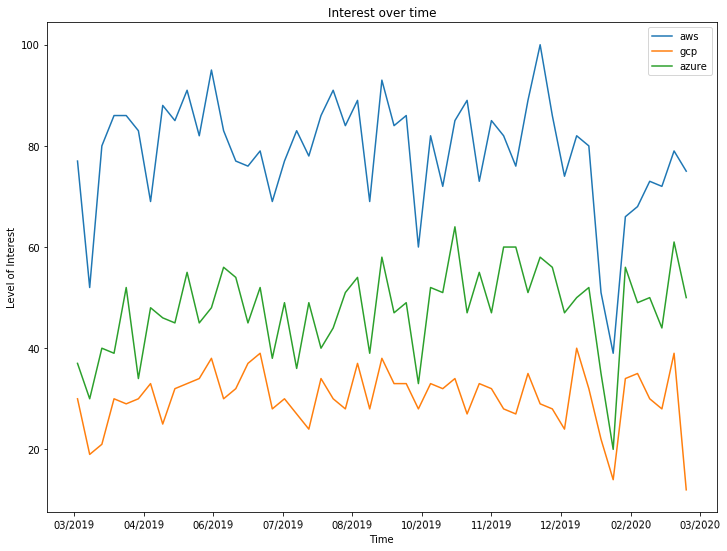

In [17]:
# x axis values: dates of the last n years (n defined above by the user)
numdays = 7
numweeks = 52
datelist = [begin_date]
for index in range (0, numweeks*numyears-2):
    datelist.append(datelist[index] + datetime.timedelta(days = numdays)) 
x_axis = datelist
# Plot into a chart 
plt.figure(figsize=(12,10))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(0,40*numyears))
plt.gcf().autofmt_xdate()
plt.plot (x_axis, interest_over_time_df.iloc[:,0], label = '{}'.format(keyword_1))
if keyword_2:
    plt.plot (x_axis, interest_over_time_df.iloc[:,1], label = '{}'.format(keyword_2))
if keyword_3:
    plt.plot (x_axis, interest_over_time_df.iloc[:,2], label = '{}'.format(keyword_3))
plt.xticks(rotation=1)
plt.xlabel('Time')
plt.ylabel('Level of Interest')
plt.title('Interest over time')
plt.legend()
plt.show()

In [18]:
#AWS related queries
related_queries_dict = pytrend.related_queries()
keyword_1_top_search = related_queries_dict['{}'.format(keyword_1)]['top']
keyword_1_top_search 

,query,value
0,aws ec2,100
1,aws s3,79
2,aws 台灣,49
3,amazon aws,45
4,amazon,45
5,aws console,44
6,aws lambda,42
7,aws cli,40
8,aws 教學,35
9,aws rds,28


/Users/charles/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 21488 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/charles/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 28771 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/charles/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 25945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/charles/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 23416 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/charles/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 21488 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/charles/opt/anaconda3/lib/python3.7/site-packages/

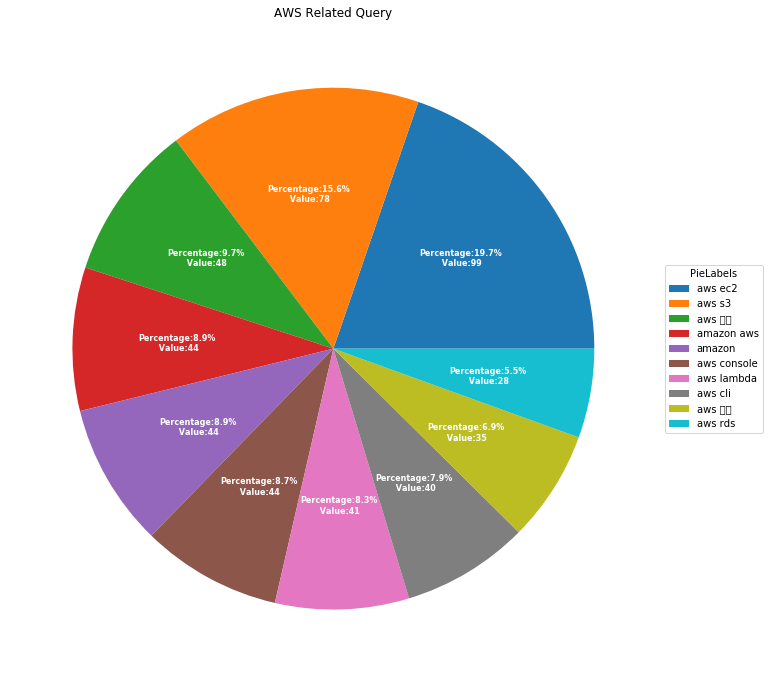

In [19]:
if keyword_1:
    if len(keyword_1_top_search.iloc[:,0])>= 10:
        keyword_1_top_search = keyword_1_top_search.head(10)
    fig, ax = plt.subplots(figsize=(12,12), subplot_kw=dict(aspect="equal"))

    # The slice names of a population distribution pie chart
    pieLabels = keyword_1_top_search.iloc[:,0] 

    # Population data
    data= keyword_1_top_search.iloc[:,1]


    def func(pct, allvals):
        absolute = int(pct/100.*np.sum(allvals))
        return "Percentage:{:.1f}%\n Value:{:d}".format(pct, absolute)


    wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                     textprops=dict(color="w"))

    ax.legend(wedges,pieLabels,
              title="PieLabels",
              loc="center left",
              bbox_to_anchor=(1, 0, 0.5, 1))

    plt.setp(autotexts, size=8, weight="bold")
    ax.set_title("{} Related Query".format(keyword_1.upper()))

    plt.show()

In [20]:
keyword_1_rising_search = related_queries_dict['{}'.format(keyword_1)]['rising']
keyword_1_rising_search

,query,value
0,aws ec2 price,300
1,aws educate,180
2,aws training,140
3,aws calculator,110
4,aws console,100
5,台灣 人壽 aws,90
6,aws 台灣,80
7,aws cli,50
8,gcp,50


In [21]:
#GCP related queries
keyword_2_top_search = related_queries_dict['{}'.format(keyword_2)]['top']
keyword_2_top_search

,query,value
0,google gcp,100
1,gcp console,59
2,aws,43
3,gcp 課程,32
4,gcp 教學,23


/Users/charles/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 35506 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/charles/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 31243 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/charles/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 35506 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/charles/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 31243 missing from current font.
  font.set_text(s, 0, flags=flags)


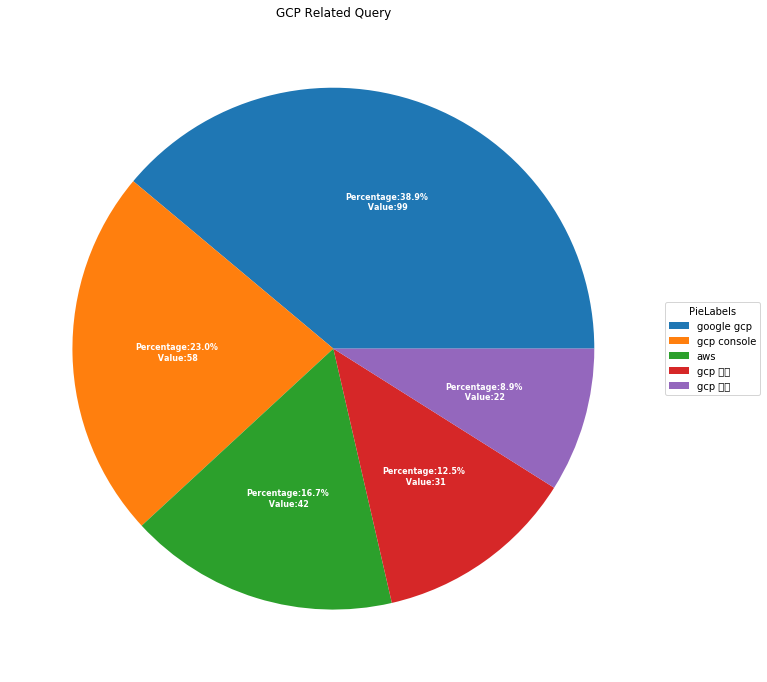

In [22]:
if keyword_2:
    if len(keyword_2_top_search.iloc[:,0])>= 10:
        keyword_2_top_search = keyword_2_top_search.head(10)
    fig, ax = plt.subplots(figsize=(12,12), subplot_kw=dict(aspect="equal"))

    # The slice names of a population distribution pie chart
    pieLabels = keyword_2_top_search.iloc[:,0] 

    # Population data
    data= keyword_2_top_search.iloc[:,1]


    def func(pct, allvals):
        absolute = int(pct/100.*np.sum(allvals))
        return "Percentage:{:.1f}%\n Value:{:d}".format(pct, absolute)


    wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                     textprops=dict(color="w"))

    ax.legend(wedges,pieLabels,
              title="PieLabels",
              loc="center left",
              bbox_to_anchor=(1, 0, 0.5, 1))

    plt.setp(autotexts, size=8, weight="bold")
    ax.set_title("{} Related Query".format(keyword_2.upper()))

    plt.show()

In [23]:
keyword_2_rising_search = related_queries_dict['{}'.format(keyword_2)]['rising']
keyword_2_rising_search

,query,value
0,gcp console,80


In [24]:
#Azure related queries
keyword_3_top_search = related_queries_dict['{}'.format(keyword_3)]['top']
keyword_3_top_search

,query,value
0,microsoft,100
1,microsoft azure,96
2,azure devops,50
3,azure ad,48
4,azure 中文,46
5,微軟 azure,31
6,azure machine learning,19
7,azure stack,17
8,azure 發音,15
9,azure data studio,13


/Users/charles/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 20013 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/charles/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 25991 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/charles/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 24494 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/charles/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 36575 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/charles/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 30332 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/charles/opt/anaconda3/lib/python3.7/site-package

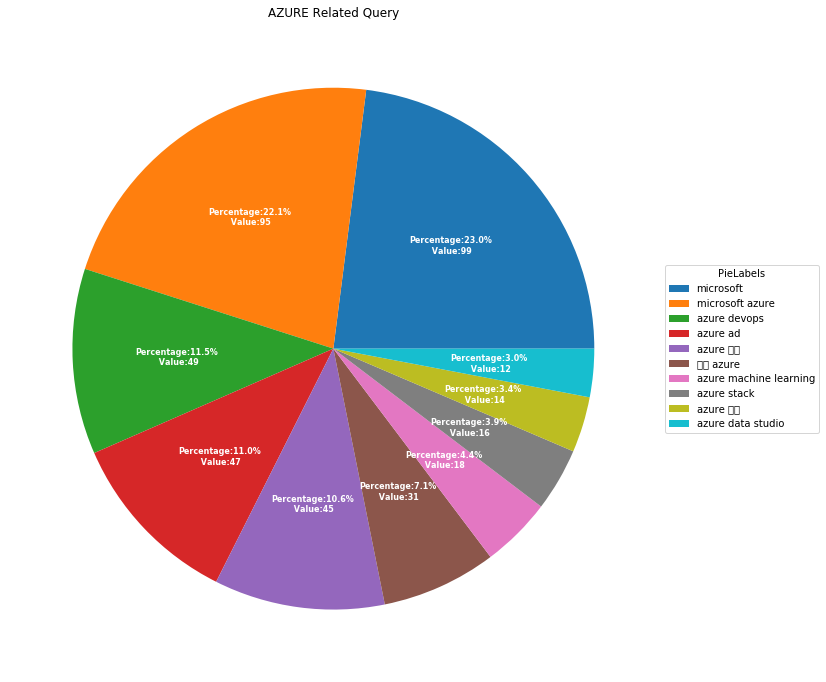

In [25]:
if keyword_3:
    if len(keyword_3_top_search.iloc[:,0])>= 10:
        keyword_3_top_search = keyword_3_top_search.head(10)
        
    fig, ax = plt.subplots(figsize=(12,12), subplot_kw=dict(aspect="equal"))

    # The slice names of a population distribution pie chart
    pieLabels = keyword_3_top_search.iloc[:,0] 

    # Population data
    data= keyword_3_top_search.iloc[:,1]


    def func(pct, allvals):
        absolute = int(pct/100.*np.sum(allvals))
        return "Percentage:{:.1f}%\n Value:{:d}".format(pct, absolute)


    wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                     textprops=dict(color="w"))

    ax.legend(wedges,pieLabels,
              title="PieLabels",
              loc="center left",
              bbox_to_anchor=(1, 0, 0.5, 1))

    plt.setp(autotexts, size=8, weight="bold")
    ax.set_title("{} Related Query".format(keyword_3.upper()))

    plt.show()

In [26]:
keyword_3_rising_search = related_queries_dict['{}'.format(keyword_3)]['rising']
keyword_3_rising_search

,query,value
0,azure data studio,27750
1,azure devops,250
2,微軟 azure,90
3,azure 發音,90
4,azure 中文,50
5,azure ad,50


In [27]:
#Search name
keywords = [keyword_1,keyword_2,keyword_3]

In [28]:
keywords

['aws', 'gcp', 'azure']

In [39]:
#選擇一年 觀看歷史資料
set_begin_date = datetime.datetime(2015, 1, 1)
set_end_date = datetime.datetime(2019, 12, 31)

print(set_begin_date.date() , set_end_date.date())
user_timeframe = set_begin_date.strftime('%Y-%m-%d')+' '+ set_end_date.strftime('%Y-%m-%d')

2015-01-01 2019-12-31


In [40]:
#Search 
pytrend.build_payload(kw_list=keywords, cat=0, timeframe=user_timeframe, geo='US', gprop='')
pytrend.interest_over_time().to_csv("interest_year_.csv", index=True)

In [41]:
raw_data = pd.read_csv('./interest_year.csv')
raw_data.head()

,date,aws,gcp,azure,isPartial
0,2015-01-04,20,1,16,False
1,2015-01-11,21,1,17,False
2,2015-01-18,21,1,17,False
3,2015-01-25,21,1,18,False
4,2015-02-01,23,1,16,False


In [32]:
raw_data = raw_data.drop(raw_data.columns[[-1]], axis=1) 

In [33]:
raw_data.head()

,date,aws,gcp,azure
0,2019-01-06,79,4,41
1,2019-01-13,77,5,42
2,2019-01-20,74,4,40
3,2019-01-27,77,5,46
4,2019-02-03,79,5,43


In [34]:
#把raw_data的date轉成時間形式
raw_data["date"] = pd.to_datetime(raw_data["date"])

In [35]:
#把月份相同的做平均
avg_month = []
for i in range(0,12):
    avg_month.append(raw_data.loc[raw_data["date"].dt.month == i+1,].mean())

In [36]:
#做完平均後轉DataFrame
avg_month = pd.DataFrame(avg_month, index =['1','2','3','4','5','6','7','8','9','10','11','12'], 
    columns =['{}'.format(keyword_1), '{}'.format(keyword_2), '{}'.format(keyword_3)])

In [37]:
avg_month

,aws,gcp,azure
1,76.75,4.50,42.25
2,76.00,5.00,43.75
3,77.40,6.00,43.40
4,78.00,5.75,44.75
5,75.25,5.25,44.25
6,78.80,5.60,45.80
7,83.00,6.00,47.75
8,82.75,6.25,48.50
9,79.20,5.80,47.00
10,82.75,6.25,48.00


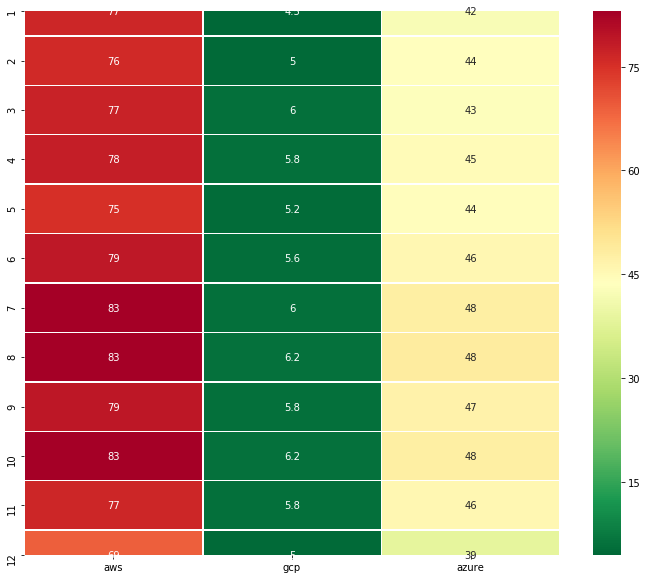

In [38]:
plt.figure(figsize=(12,10))
sns.heatmap(avg_month,cmap='RdYlGn_r',annot=True, linewidth=0.5)